# stocks X sentiment analysis dataset
this notebook idea is to do sentiment analysis about socks related tweets and check the correlation between 
these tweets and the actual stocks prices, and to check if we can predict stocks changes by the tweets



In [ ]:
# !pip install kaggle
# before using kaggle commands put kaggle.json token file in user directory
import zipfile
!kaggle datasets download -d equinxx/stock-tweets-for-sentiment-analysis-and-prediction

z= zipfile.ZipFile('stock-tweets-for-sentiment-analysis-and-prediction.zip')
z.extractall()


  0%|          | 0.00/6.59M [00:00<?, ?B/s]
 15%|█▌        | 1.00M/6.59M [00:01<00:05, 979kB/s]
 30%|███       | 2.00M/6.59M [00:01<00:03, 1.41MB/s]
 45%|████▌     | 3.00M/6.59M [00:02<00:02, 1.59MB/s]
 61%|██████    | 4.00M/6.59M [00:02<00:01, 1.52MB/s]
 76%|███████▌  | 5.00M/6.59M [00:03<00:01, 1.59MB/s]
 91%|█████████ | 6.00M/6.59M [00:04<00:00, 1.61MB/s]
100%|██████████| 6.59M/6.59M [00:04<00:00, 1.66MB/s]
100%|██████████| 6.59M/6.59M [00:04<00:00, 1.55MB/s]


## imports

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# nlp
import re
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer# classification
nltk.download('vader_lexicon')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

# Explore the overall datasets

In [10]:
tweets = pd.read_csv('stock_tweets.csv')

# changing col names
tweets.rename(columns = {'Date':'date','Tweet':'tweet'}, inplace=True)

tweets

,date,tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."
...,...,...,...,...
80788,2021-10-07 17:11:57+00:00,Some of the fastest growing tech stocks on the...,XPEV,XPeng Inc.
80789,2021-10-04 17:05:59+00:00,"With earnings on the horizon, here is a quick ...",XPEV,XPeng Inc.
80790,2021-10-01 04:43:41+00:00,Our record delivery results are a testimony of...,XPEV,XPeng Inc.
80791,2021-10-01 00:03:32+00:00,"We delivered 10,412 Smart EVs in Sep 2021, rea...",XPEV,XPeng Inc.


In [3]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80793 entries, 0 to 80792
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          80793 non-null  object
 1   tweet         80793 non-null  object
 2   Stock Name    80793 non-null  object
 3   Company Name  80793 non-null  object
dtypes: object(4)
memory usage: 2.5+ MB


## Check the companies we working with

In [ ]:

tweets["Stock Name"].unique(),"",tweets["Company Name"].unique()


(array(['TSLA', 'MSFT', 'PG', 'META', 'AMZN', 'GOOG', 'AMD', 'AAPL',
        'NFLX', 'TSM', 'KO', 'F', 'COST', 'DIS', 'VZ', 'CRM', 'INTC', 'BA',
        'BX', 'NOC', 'PYPL', 'ENPH', 'NIO', 'ZS', 'XPEV'], dtype=object),
 '',
 array(['Tesla, Inc.', 'Microsoft Corporation', 'Procter & Gamble Company',
        'Meta Platforms, Inc.', 'Amazon.com, Inc.', 'Alphabet Inc.',
        'Advanced Micro Devices, Inc.', 'Apple Inc.', 'Netflix, Inc.',
        'Taiwan Semiconductor Manufacturing Company Limited',
        'The Coca-Cola Company', 'Ford Motor Company',
        'Costco Wholesale Corporation', 'The Walt Disney Company',
        'Verizon Communications Inc.', 'Salesforce, Inc.',
        'Intel Corporation', 'The Boeing Company', 'Blackstone Inc.',
        'Northrop Grumman Corporation', 'PayPal Holdings, Inc.',
        'Enphase Energy, Inc.', 'NIO Inc.', 'Zscaler, Inc.', 'XPeng Inc.'],
       dtype=object))

In [4]:
# do simple tokenizing and calculate the S/W ratio
tokenized = tweets.tweet.apply(lambda r: [w for w in r.split()])
tweets.shape[0] / tokenized.apply(lambda e: len(e)).values.mean()


2950.3118214348506

## check each company occurances counts in the data

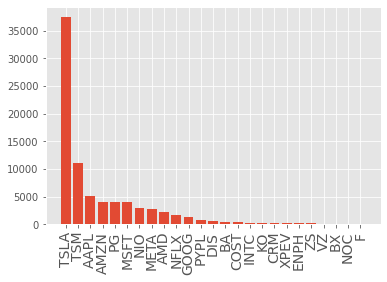

In [ ]:
# check each company occurances counts in the data
counts_df = tweets.groupby(['Stock Name']).size().reset_index(name='counts').sort_values(['counts'], ascending=False)
style.use('ggplot')
plt.bar(counts_df["Stock Name"].values,counts_df["counts"].values)
plt.xticks(fontsize=14, rotation=90)
plt.show()

## keep only stocks with high number of samples (>1500) # dont

In [11]:
# keep_list = counts_df[counts_df['counts'] > 1500]['Stock Name'].values
# keep_list
# tweets = tweets[tweets['Stock Name'].isin(keep_list)]

tweets['date'] = pd.to_datetime(tweets['date']) 
tweets['date'] = tweets['date'].apply(lambda x: x.strftime('%Y-%m-%d'))
tweets
# counts_df

,date,tweet,Stock Name,Company Name
0,2022-09-29,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."
...,...,...,...,...
80788,2021-10-07,Some of the fastest growing tech stocks on the...,XPEV,XPeng Inc.
80789,2021-10-04,"With earnings on the horizon, here is a quick ...",XPEV,XPeng Inc.
80790,2021-10-01,Our record delivery results are a testimony of...,XPEV,XPeng Inc.
80791,2021-10-01,"We delivered 10,412 Smart EVs in Sep 2021, rea...",XPEV,XPeng Inc.


In [19]:
stocks = pd.read_csv('stock_yfinance_data.csv')
# stocks = stocks[stocks['Stock Name'].isin(keep_list)]
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA


# Work with tesla data only

In [20]:
tweets = tweets[tweets['Stock Name'] == 'TSLA']
stocks = stocks[stocks['Stock Name'] == 'TSLA']

tweets.shape, stocks.shape

((37422, 4), (252, 8))

## Classify tweets

In [29]:
clf = SentimentIntensityAnalyzer()
tweets['compund'] = tweets['tweet'].apply(lambda e: clf.polarity_scores(e)['compound'])

In [30]:
tweets

,date,tweet,Stock Name,Company Name,compund
0,2022-09-29,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",0.0772
1,2022-09-29,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",0.0000
2,2022-09-29,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",0.2960
3,2022-09-29,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",-0.7568
4,2022-09-29,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",-0.8750
...,...,...,...,...,...
37417,2021-09-30,Playing in the dirt and #chasingsunsets\n@tesl...,TSLA,"Tesla, Inc.",-0.1531
37418,2021-09-30,I agree with @freshjiva that $TSLA ‘s EV busin...,TSLA,"Tesla, Inc.",0.5719
37419,2021-09-30,Hold. On. Tight. $TSLA,TSLA,"Tesla, Inc.",0.0000
37420,2021-09-30,Get ready for a $TSLA _ _ _ _ _ _ Q3 delivery...,TSLA,"Tesla, Inc.",0.4215


# plan
    1. train binary sentiment classification model and get a good accuracy.
    2. apply classification on the tweets dataset.
    3. do some analysis on big companies by number of positive and negative classification results.
    4. use the classification results to check correlation between tweets sentiment on a company and its stocks values in the same period.
